# Customer Time Series EDA
Kaggle's "American Express - Default Prediction" Competition provides us with time series data from credit card customers. For each customer we have 188 data points for each of up to 13 points in time. Therefore most customers have `2444 = 188 * 13` data points. For each customer, we can plot the 188 line plots that show how each variable (for one specific customer) changes over time.

Furthermore we can plot time series for customers who default on their credit payment. This is `target = 1` and is shown in blue below. And we can plot customers who do not default. This is `target = 0` and shown in orange below. By looking at different customers and different variables, we can gain intuition about which variables predict default.

In this notebook we chose 33 variables that look interesting. For each variable, we plot 32 default customers' time series, and 32 non-default customers' time series. To the right of the line plots, we plot a histogram also. Discussion about this EDA is [here][4].

If you wish to view the other 155 features, then copy and edit this notebook and display whichever variables you want. From the competition description [here][1], we know there are 5 types of variables. And there are 188 variables in total.

* D_* = 96 Delinquency variables
* S_* = 21 Spend variables
* P_* = 3 Payment variables
* B_* = 40 Balance variables
* R_* = 28 Risk variables

When you are ready to build a time series model like an RNN or Transformer that takes advantage of what you see in these plots, check out my TF GRU starter notebook [here][2] and check out my TF Transformer starter notebook [here][3]

[1]: https://www.kaggle.com/competitions/amex-default-prediction/data
[2]: https://www.kaggle.com/cdeotte/tensorflow-gru-starter-0-787
[3]: https://www.kaggle.com/code/cdeotte/tensorflow-transformer-0-790
[4]: https://www.kaggle.com/competitions/amex-default-prediction/discussion/327761

# Load Train Data

In [1]:
# LOAD LIBRARIES
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# LOAD TRAIN DATA AND MERGE TARGETS ONTO FEATURES
df = pd.read_csv('../input/amex-default-prediction/train_data.csv', nrows=100_000)
df.S_2 = pd.to_datetime(df.S_2)
df2 = pd.read_csv('../input/amex-default-prediction/train_labels.csv')
df = df.merge(df2,on='customer_ID',how='left')

In [2]:
def plot_time_series(prefix='D', cols=None, display_ct=32):
    
    # DETERMINE WHICH COLUMNS TO PLOT
    if cols is not None and len(cols)==0: cols = None
    if cols is None:
        COLS = df.columns[2:-1]
        COLS = np.sort( [int(x[2:]) for x in COLS if x[0]==prefix] )
        COLS = [f'{prefix}_{x}' for x in COLS]
        print('#'*25)
        print(f'Plotting all {len(COLS)} columns with prefix {prefix}')
        print('#'*25)
    else:
        COLS = [f'{prefix}_{x}' for x in cols]
        print('#'*25)
        print(f'Plotting {len(COLS)} columns with prefix {prefix}')
        print('#'*25)

    # ITERATE COLUMNS
    for c in COLS:

        # CONVERT DATAFRAME INTO SERIES WITH COLUMN
        tmp = df[['customer_ID','S_2',c,'target']].copy()
        tmp2 = tmp.groupby(['customer_ID','target'])[['S_2',c]].agg(list).reset_index()
        tmp3 = tmp2.loc[tmp2.target==1]
        tmp4 = tmp2.loc[tmp2.target==0]

        # FORMAT PLOT
        spec = gridspec.GridSpec(ncols=2, nrows=1,
                             width_ratios=[3, 1], wspace=0.1,
                             hspace=0.5, height_ratios=[1])
        fig = plt.figure(figsize=(20,10))
        ax0 = fig.add_subplot(spec[0])

        # PLOT 32 DEFAULT CUSTOMERS AND 32 NON-DEFAULT CUSTOMERS
        t0 = []; t1 = []
        for k in range(display_ct):
            try:
                # PLOT DEFAULTING CUSTOMERS
                row = tmp3.iloc[k]
                ax0.plot(row.S_2,row[c],'-o',color='blue')
                t1 += row[c]
                # PLOT NON-DEFAULT CUSTOMERS
                row = tmp4.iloc[k]
                ax0.plot(row.S_2,row[c],'-o',color='orange')
                t0 += row[c]
            except:
                pass
        plt.title(f'Feature {c} (Key: BLUE=DEFAULT, orange=no default)',size=18)

        # PLOT HISTOGRAMS
        ax1 = fig.add_subplot(spec[1])
        try:
            # COMPUTE BINS
            t = t0+t1; mn = np.nanmin(t); mx = np.nanmax(t)
            if mx==mn:
                mx += 0.01; mn -= 0.01
            bins = np.arange(mn,mx+(mx-mn)/20,(mx-mn)/20 )
            # PLOT HISTOGRAMS
            if np.sum(np.isnan(t1))!=len(t1):
                ax1.hist(t1,bins=bins,orientation="horizontal",alpha = 0.8,color='blue')
            if np.sum(np.isnan(t0))!=len(t0):
                ax1.hist(t0,bins=bins,orientation="horizontal",alpha = 0.8,color='orange')
        except:
            pass
        plt.show()

# Plot Delinquency Variables

#########################
Plotting 15 columns with prefix D
#########################


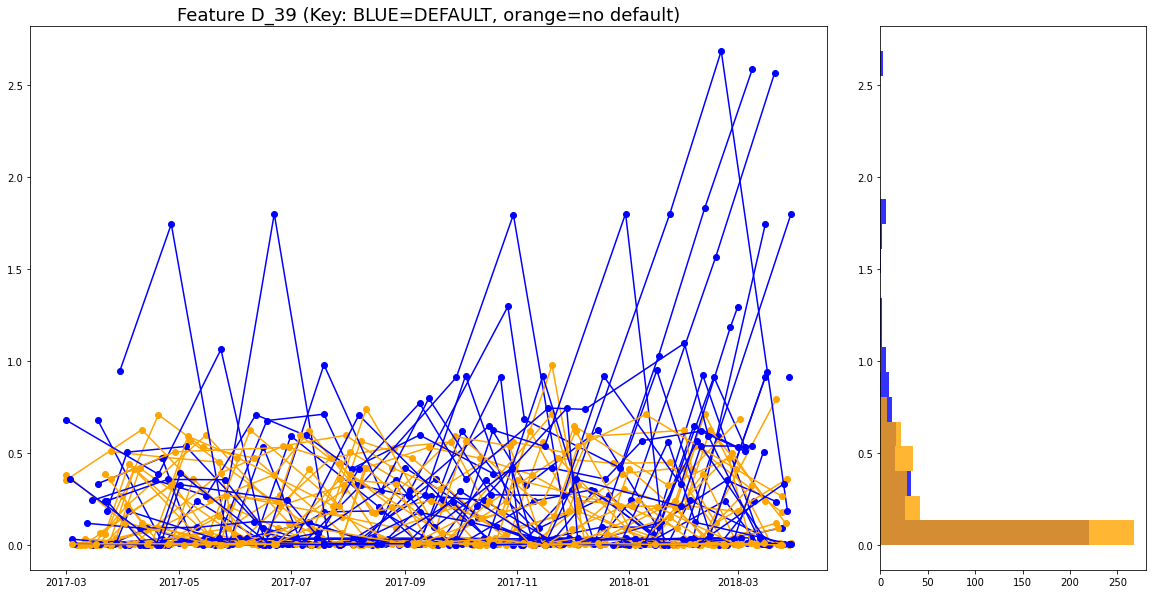

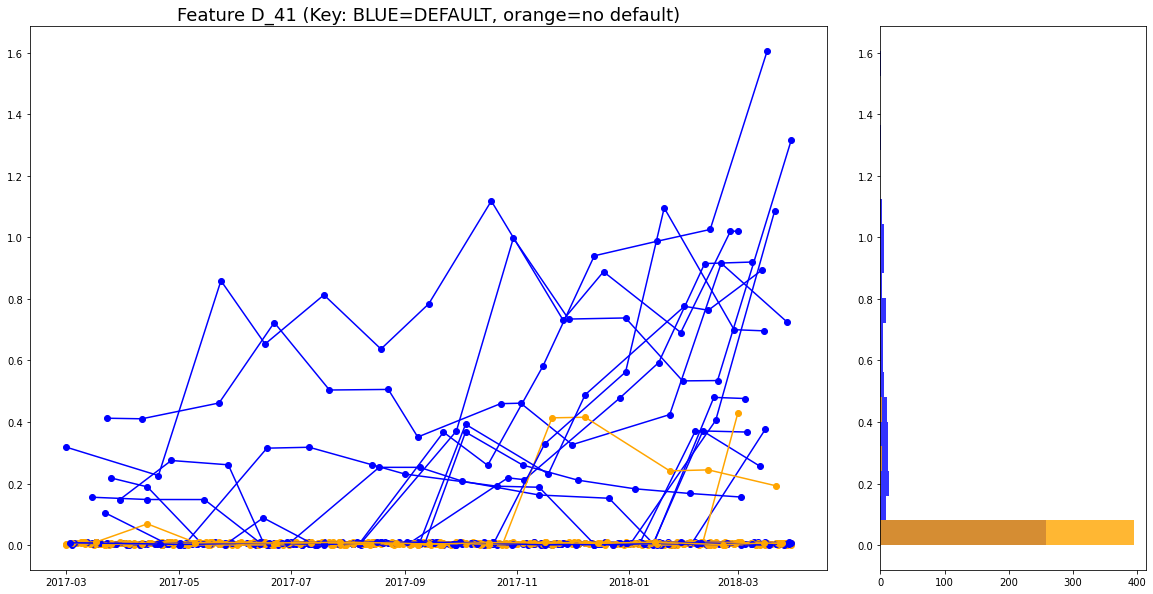

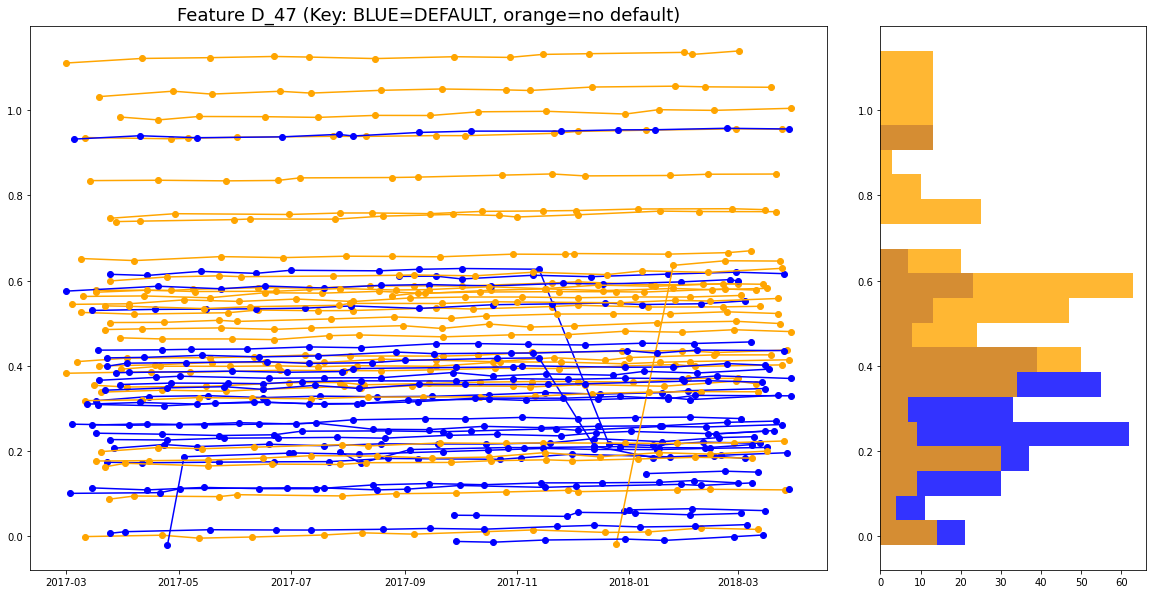

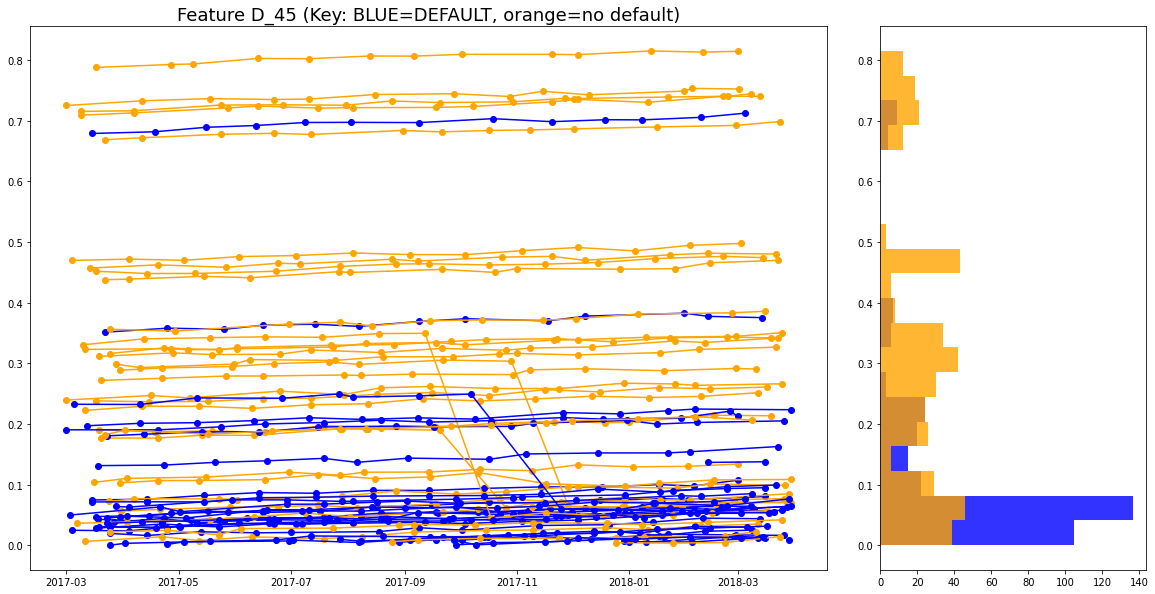

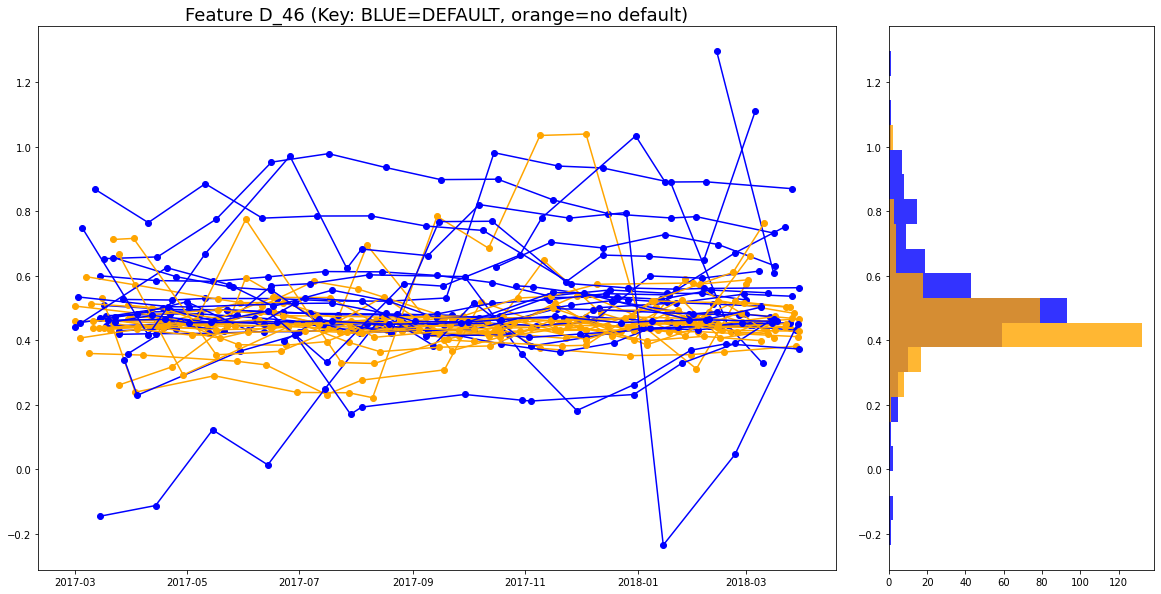

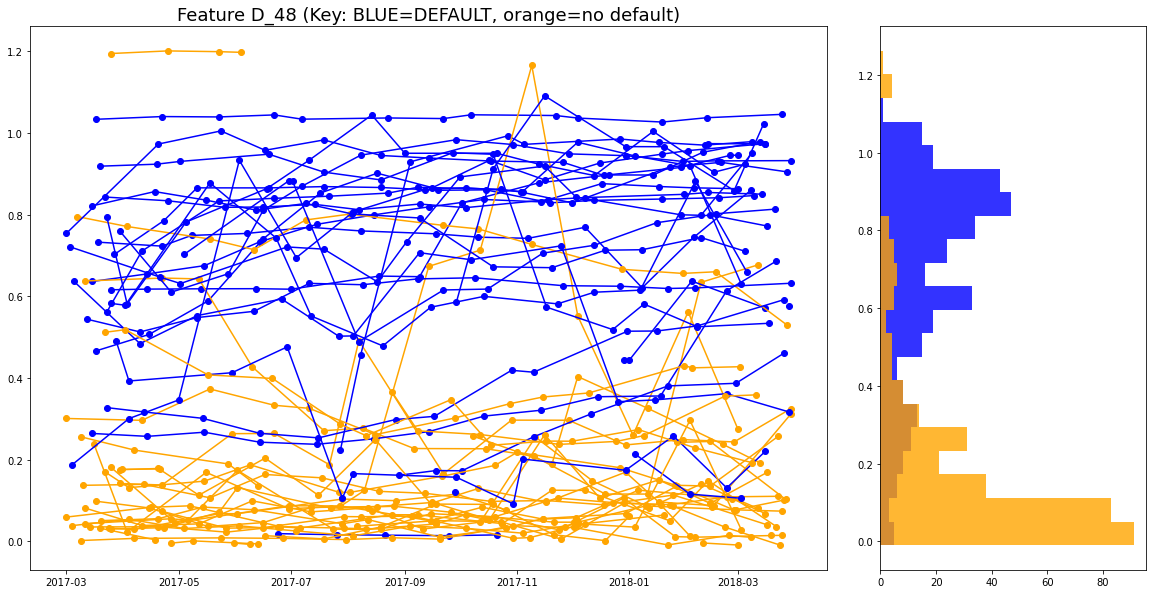

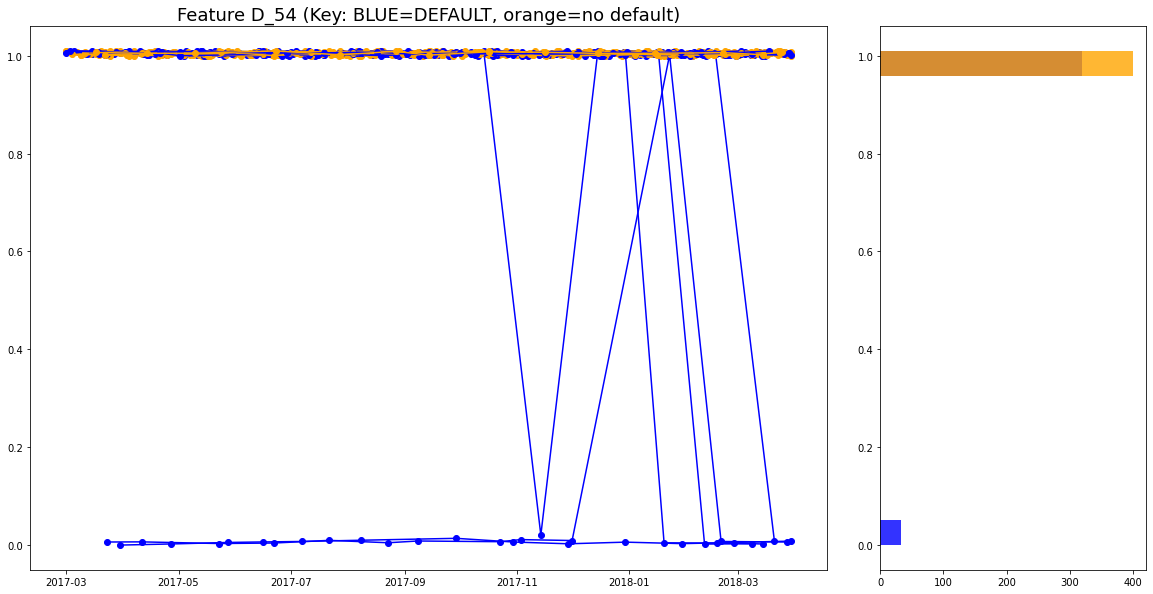

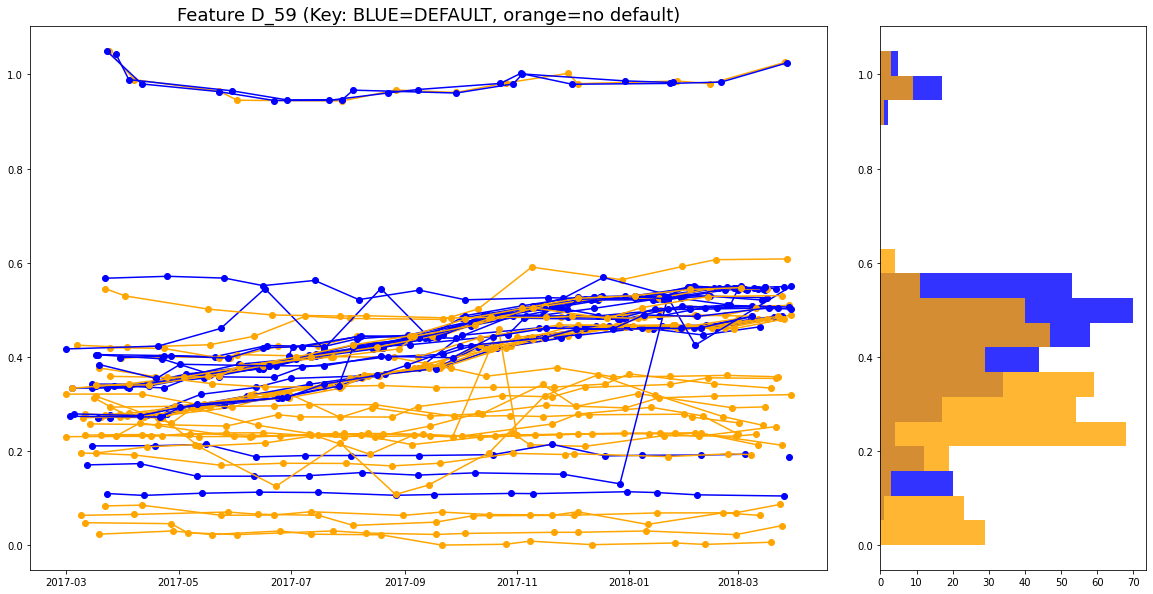

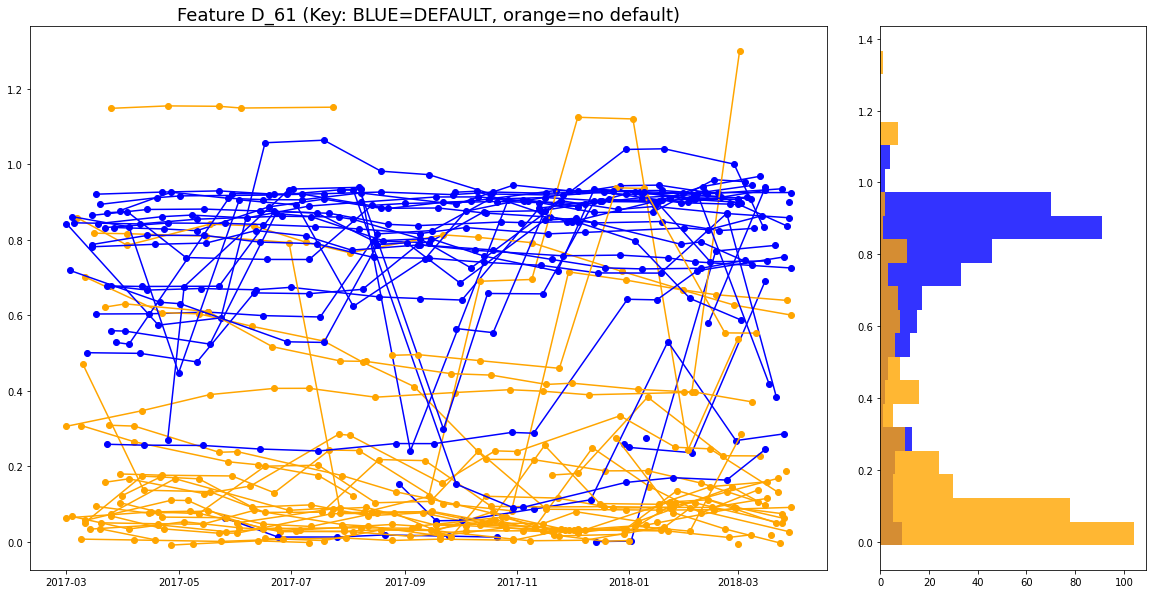

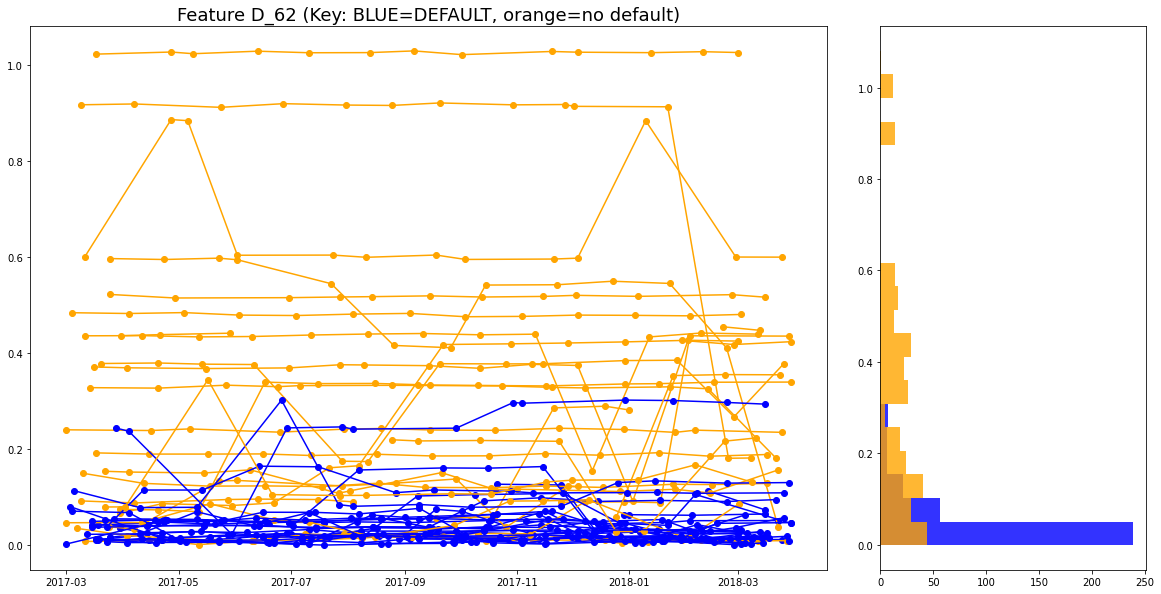

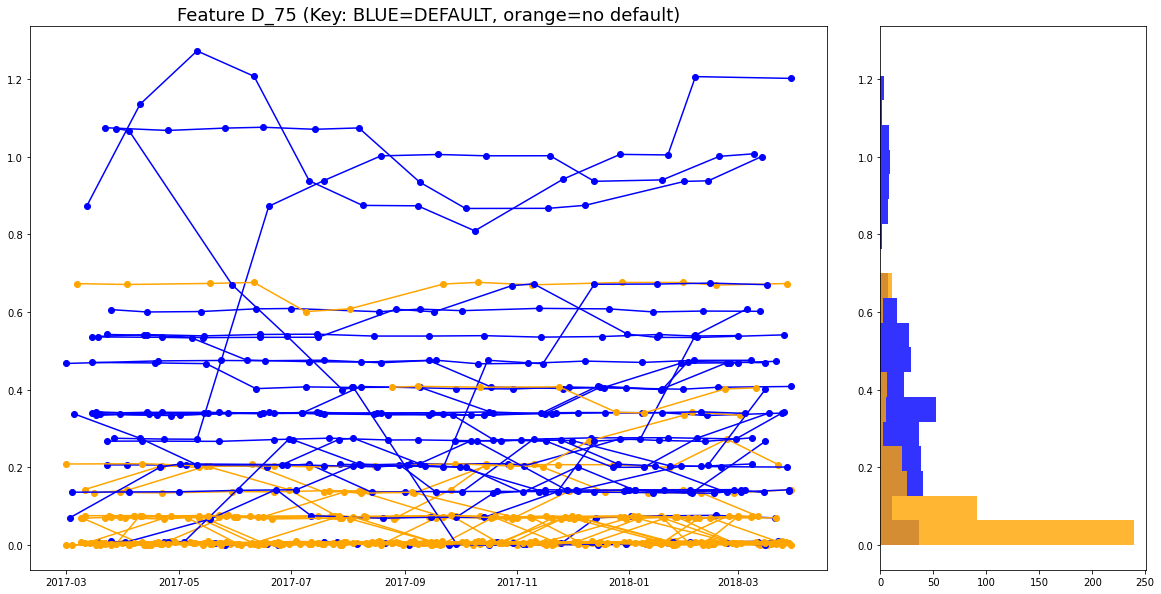

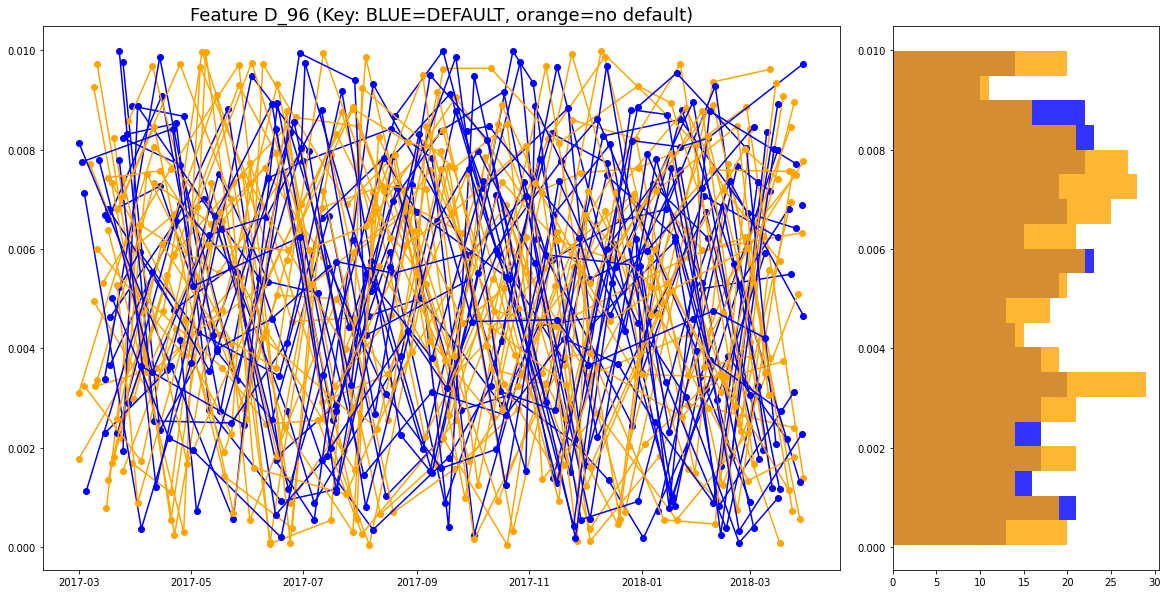

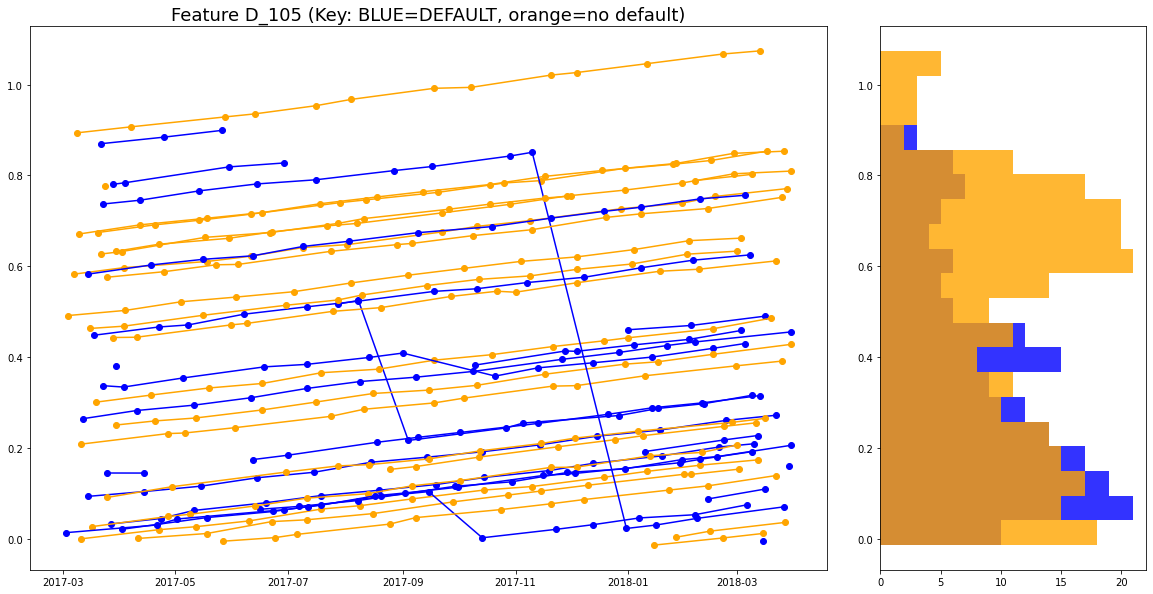

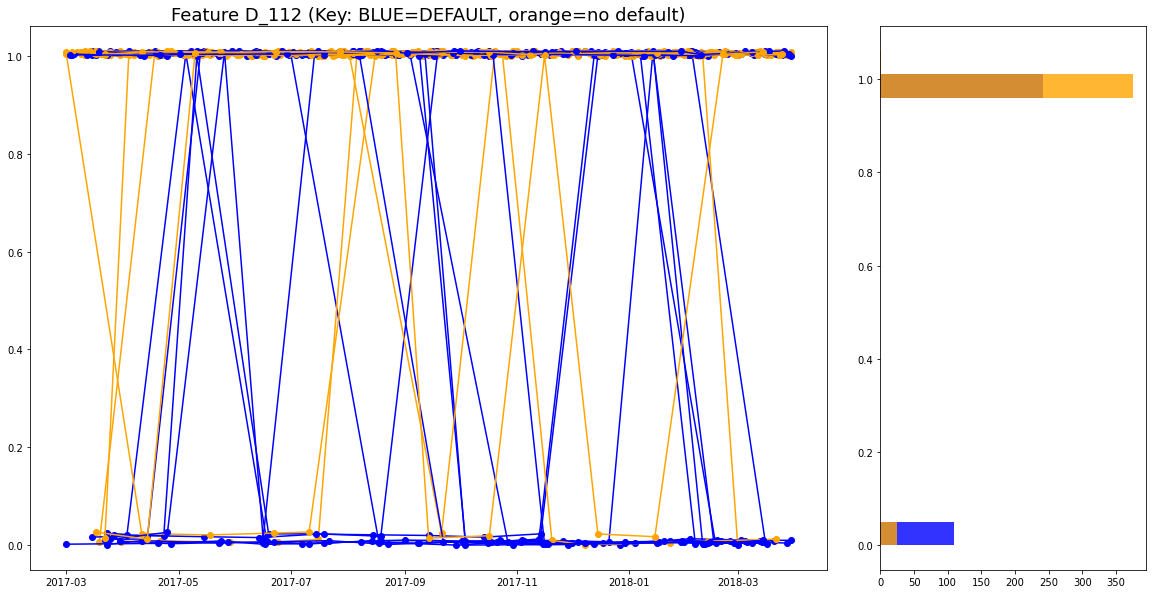

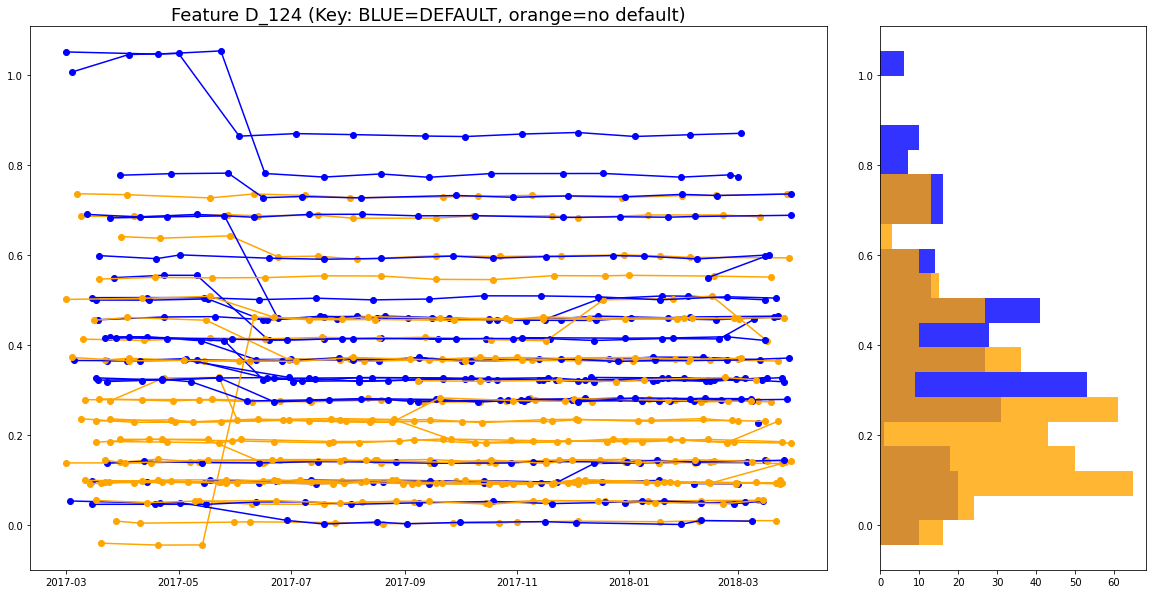

In [3]:
# LEAVE LIST BLANK TO PLOT ALL
plot_time_series('D',[39,41,47,45,46,48,54,59,61,62,75,96,105,112,124])

# Plot Spend Variables

#########################
Plotting 5 columns with prefix S
#########################


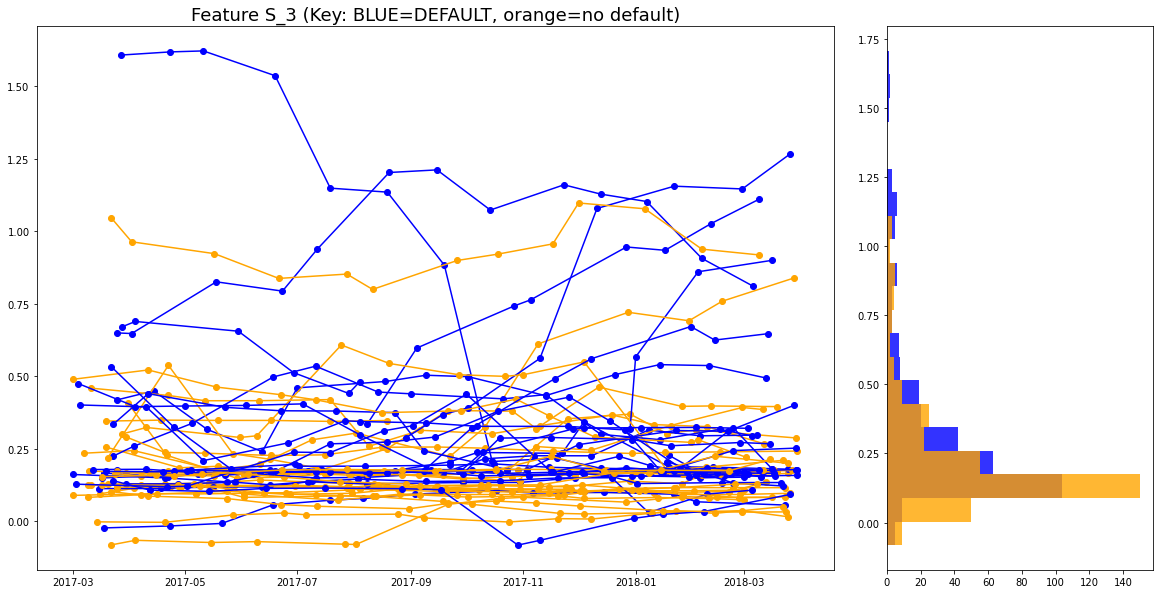

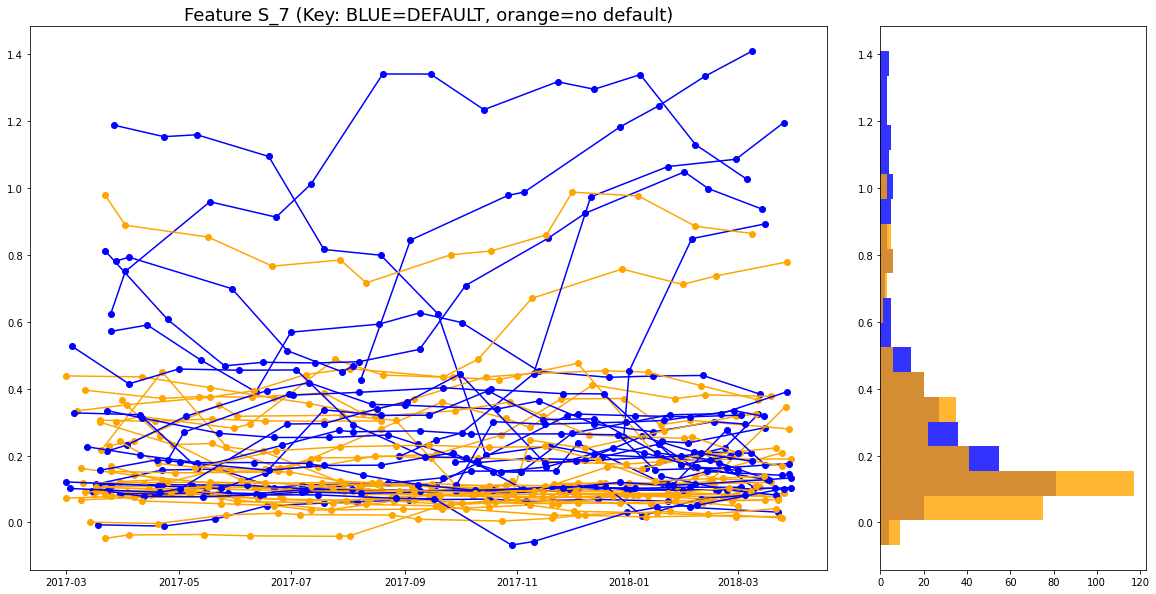

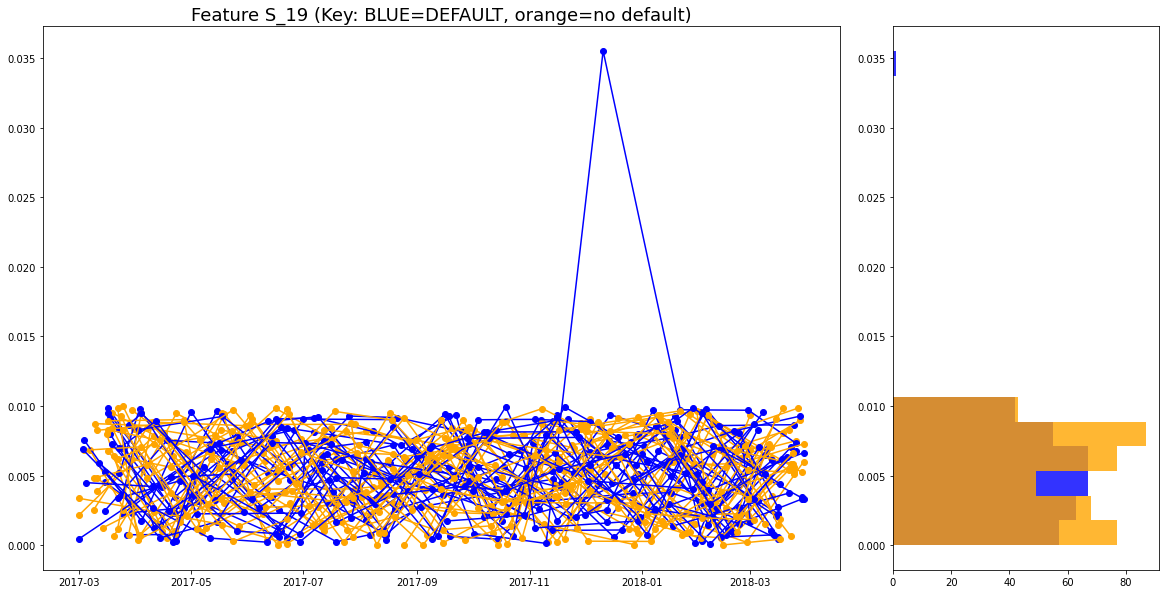

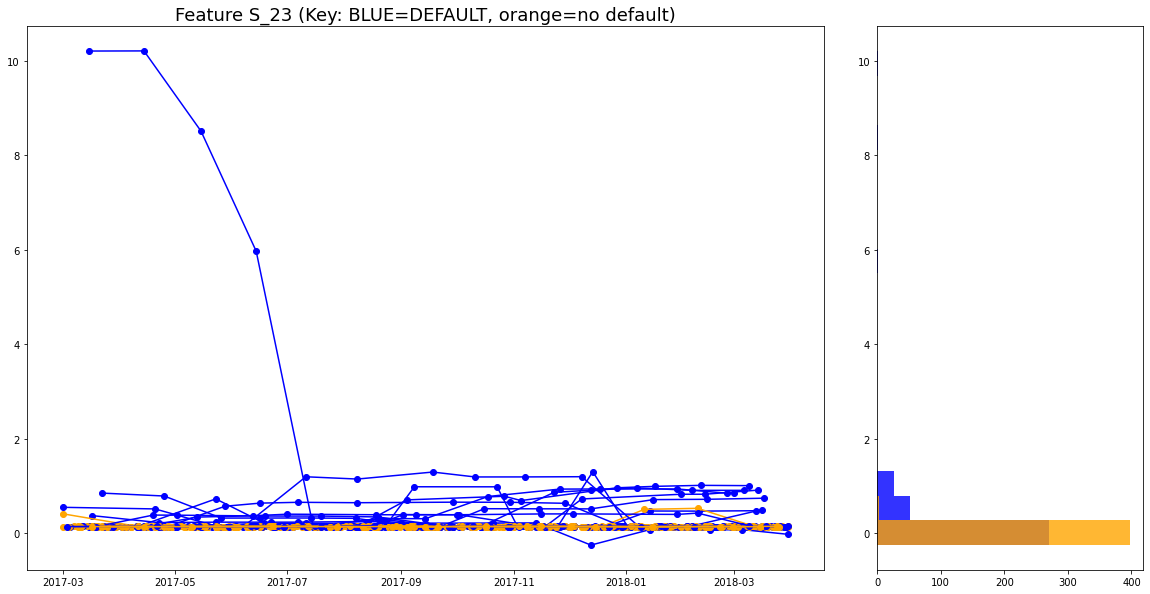

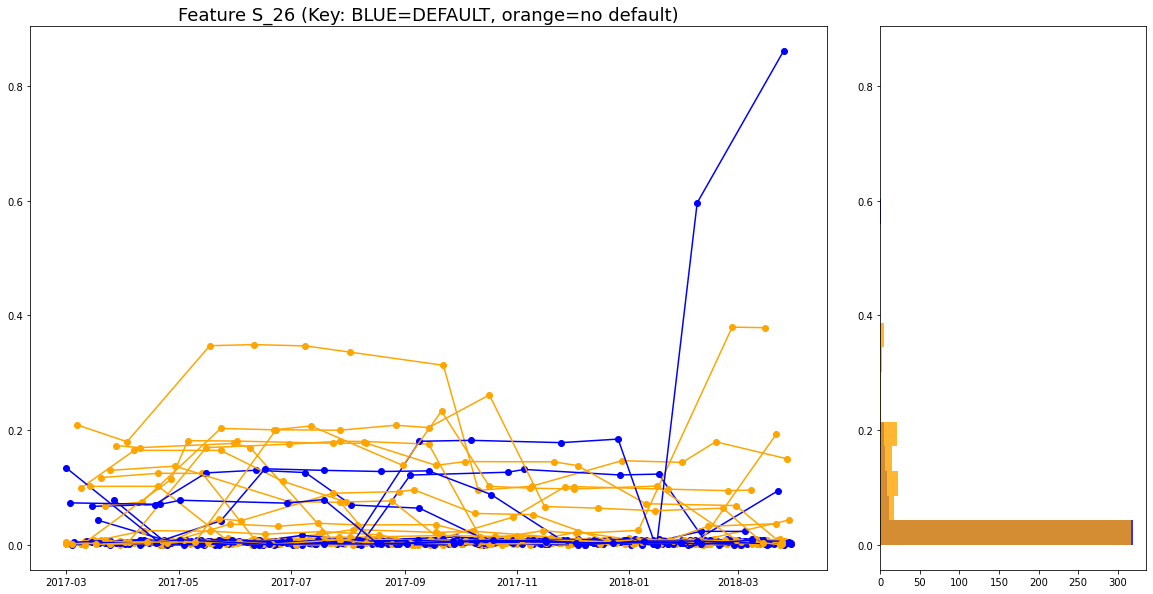

In [4]:
# LEAVE LIST BLANK TO PLOT ALL
plot_time_series('S',[3,7,19,23,26])

# Plot Payment Variables

#########################
Plotting 2 columns with prefix P
#########################


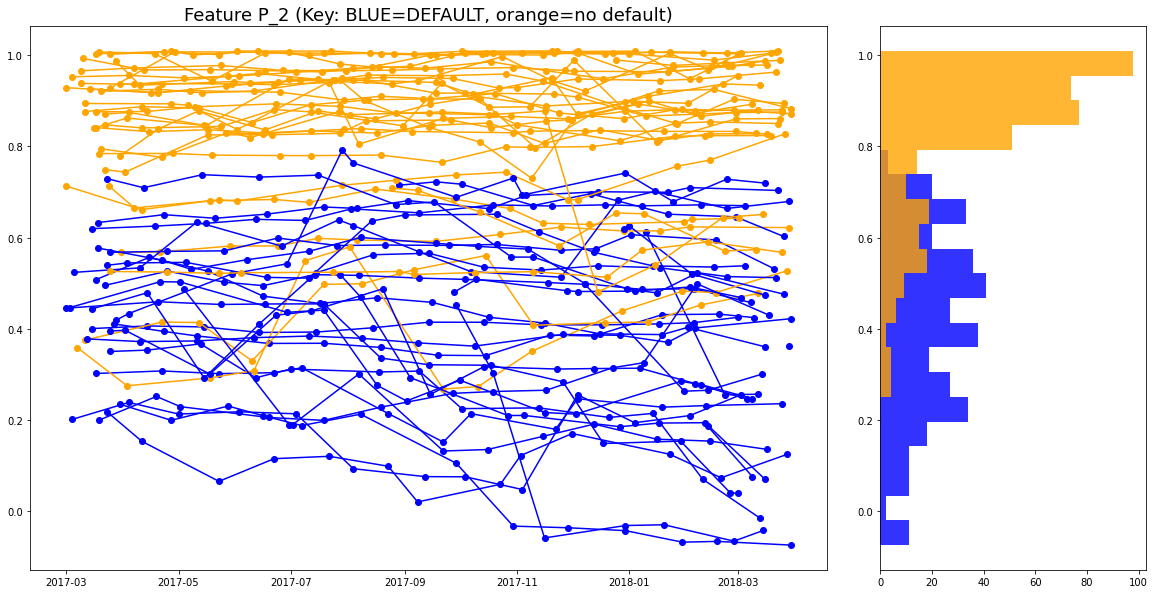

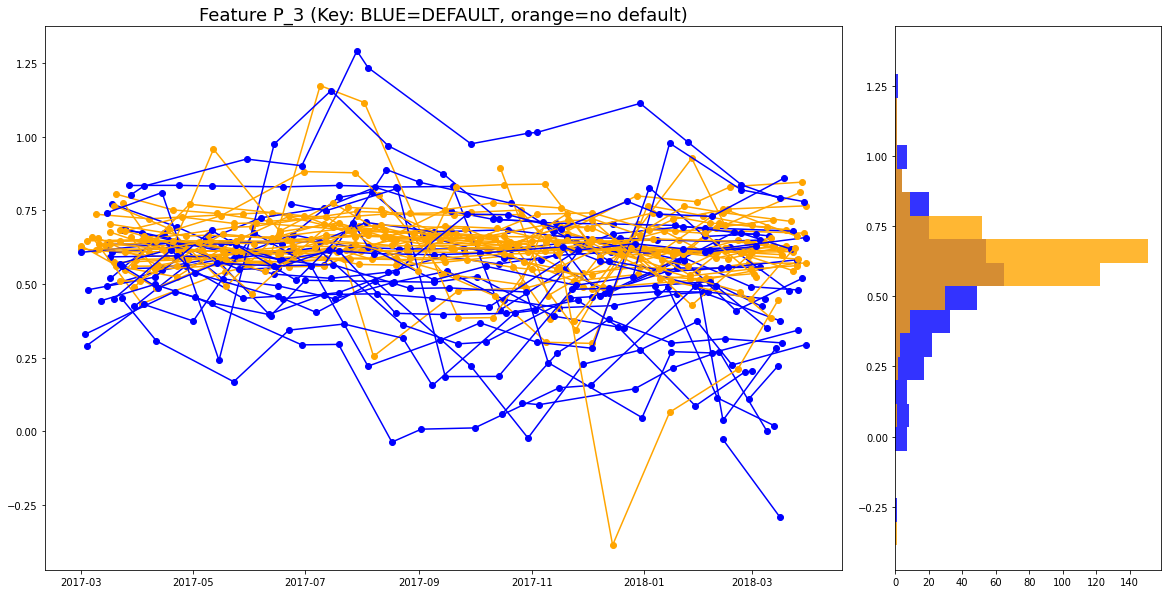

In [5]:
# LEAVE LIST BLANK TO PLOT ALL
plot_time_series('P',[2,3])

# Plot Balance Variables

#########################
Plotting 7 columns with prefix B
#########################


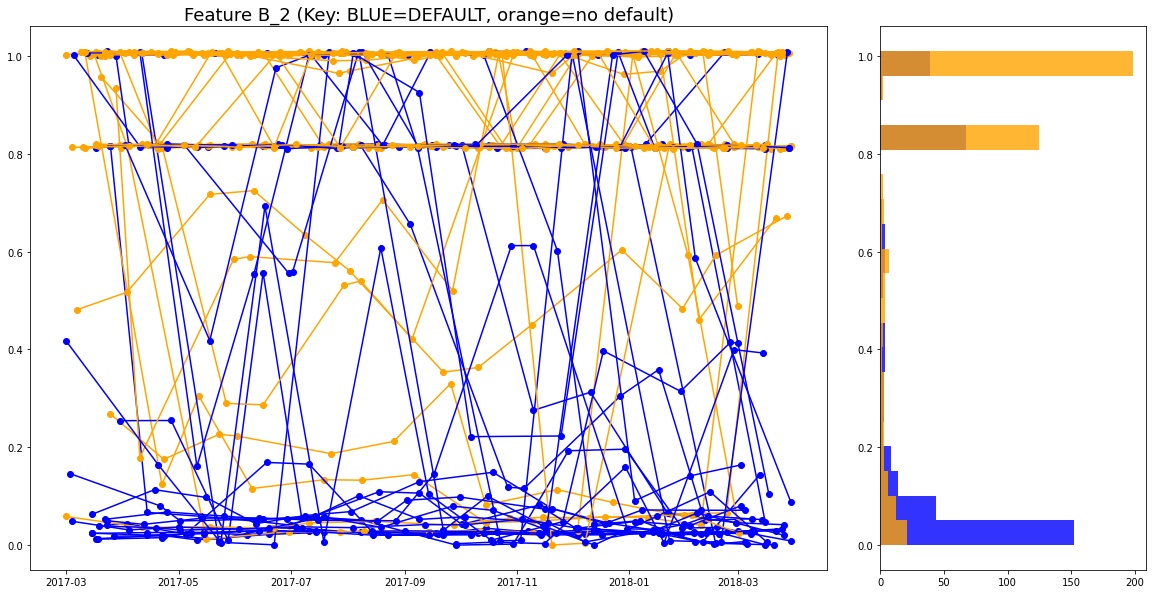

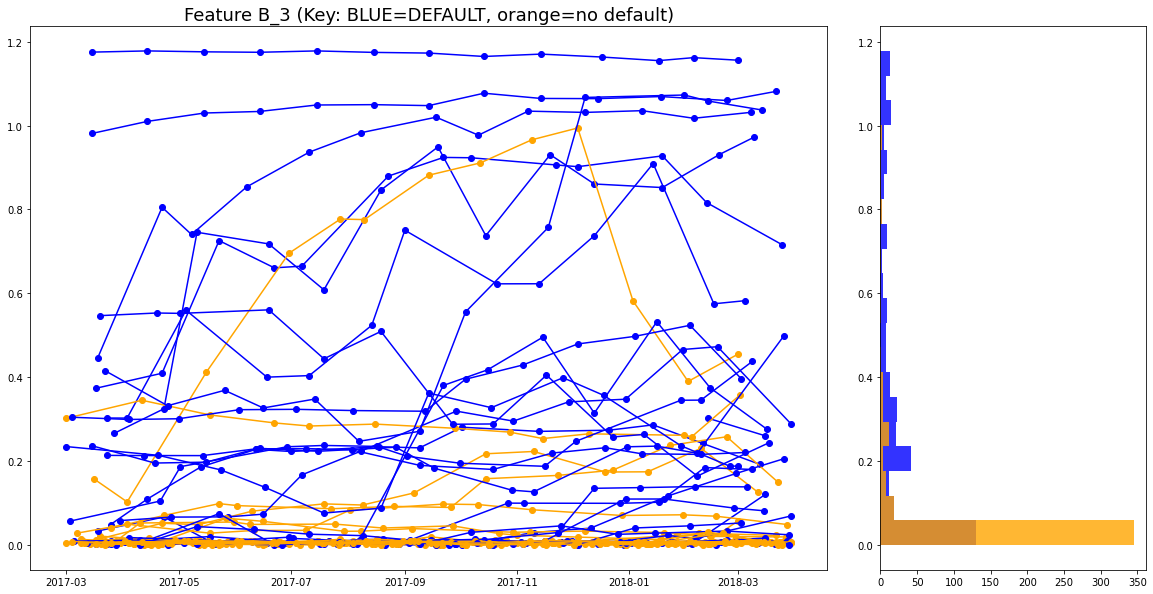

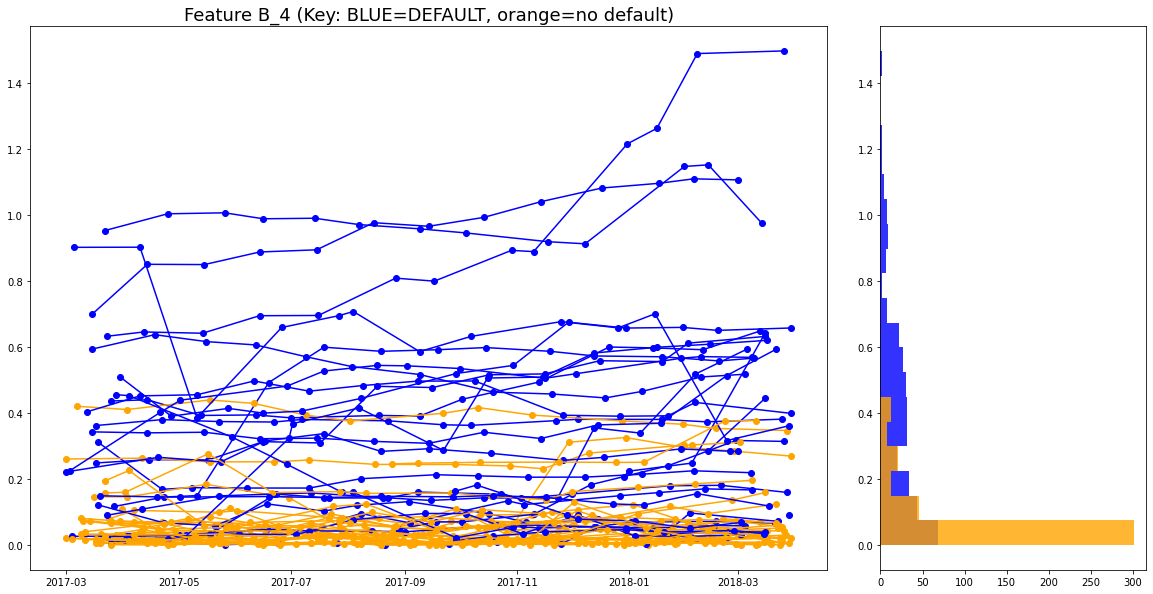

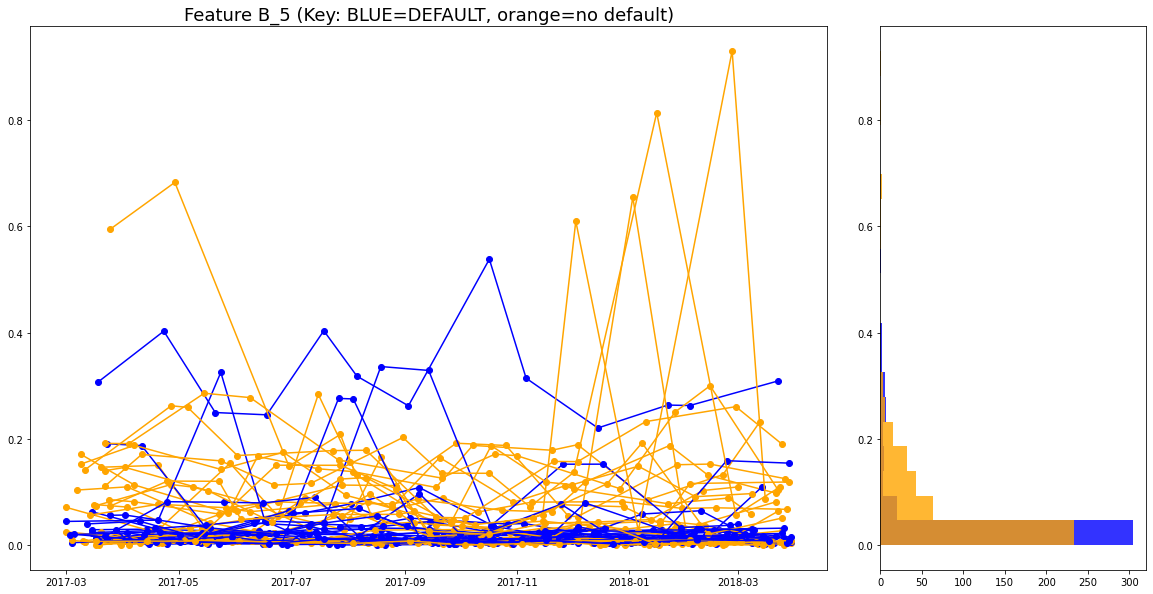

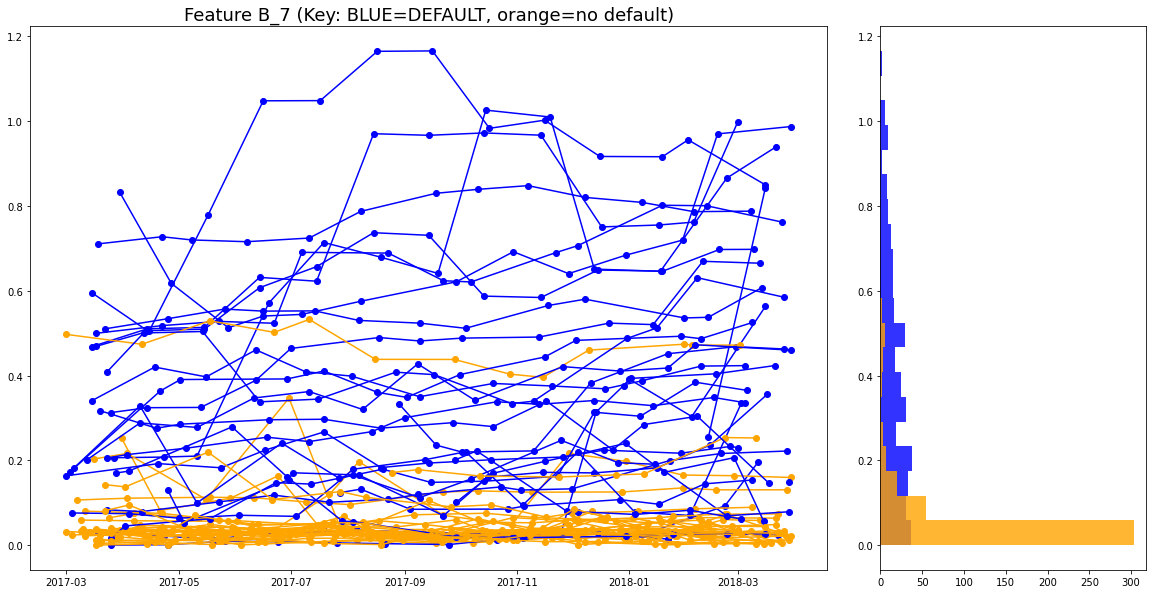

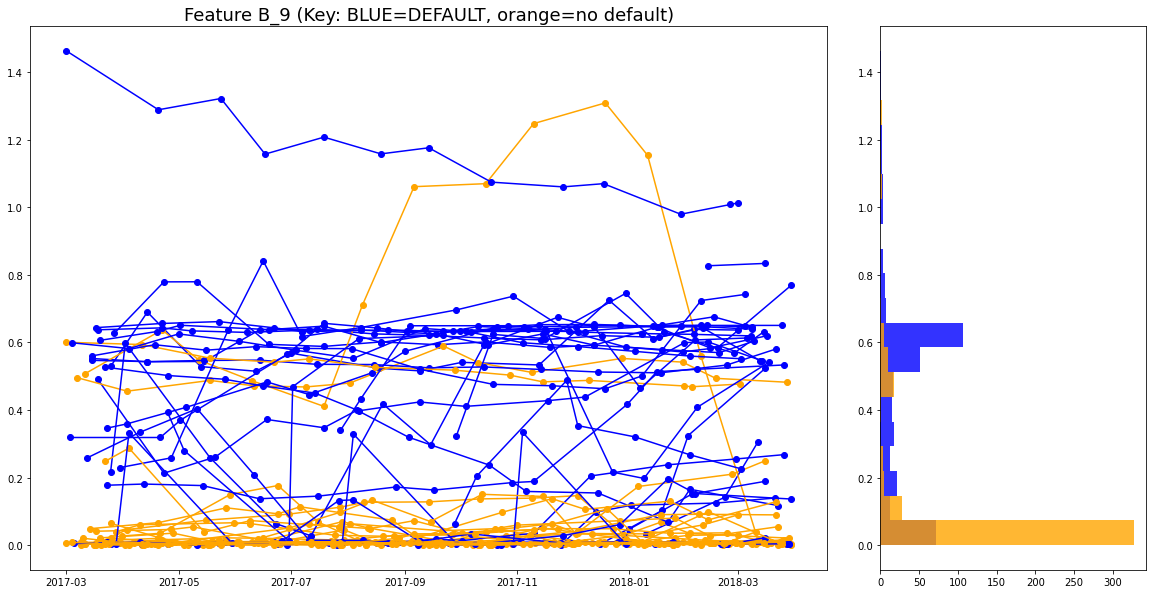

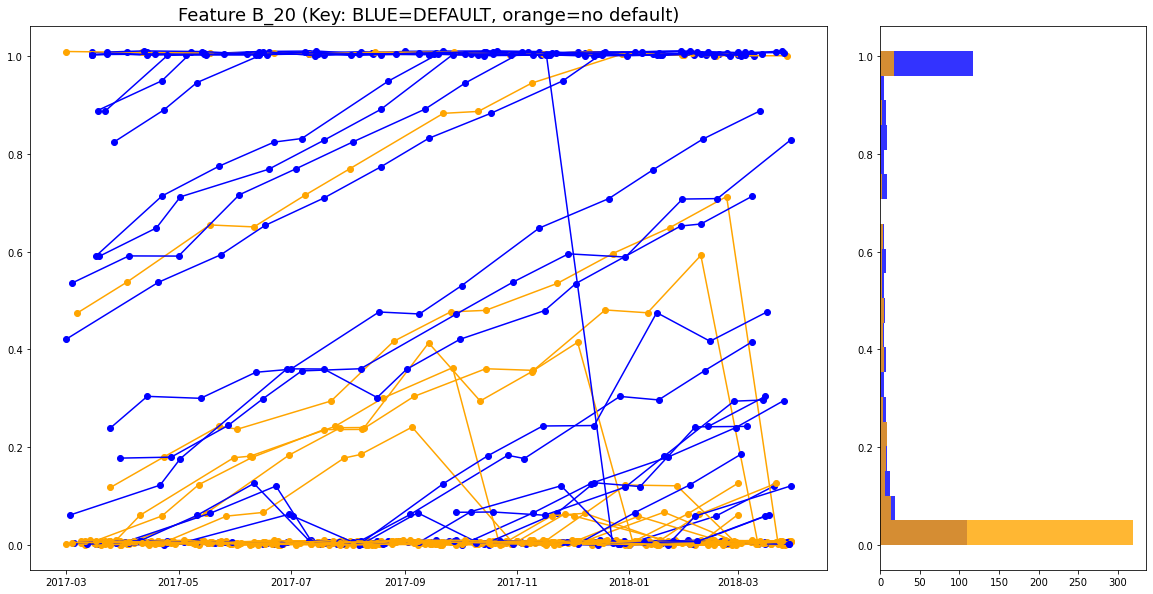

In [6]:
# LEAVE LIST BLANK TO PLOT ALL
plot_time_series('B',[2,3,4,5,7,9,20])

# Plot Risk Variables

#########################
Plotting 4 columns with prefix R
#########################


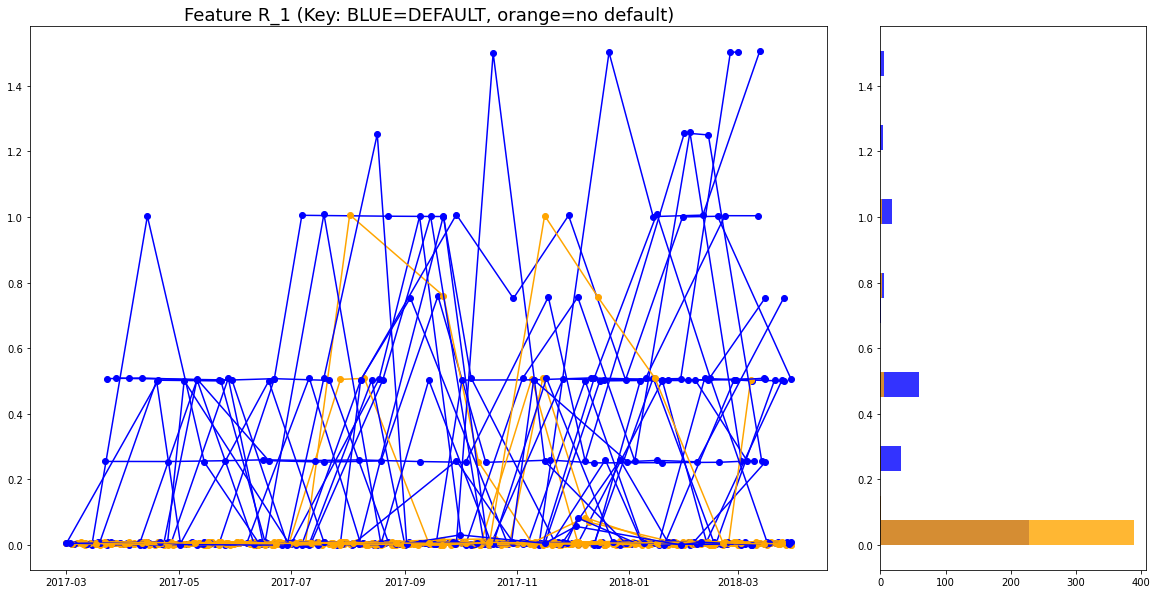

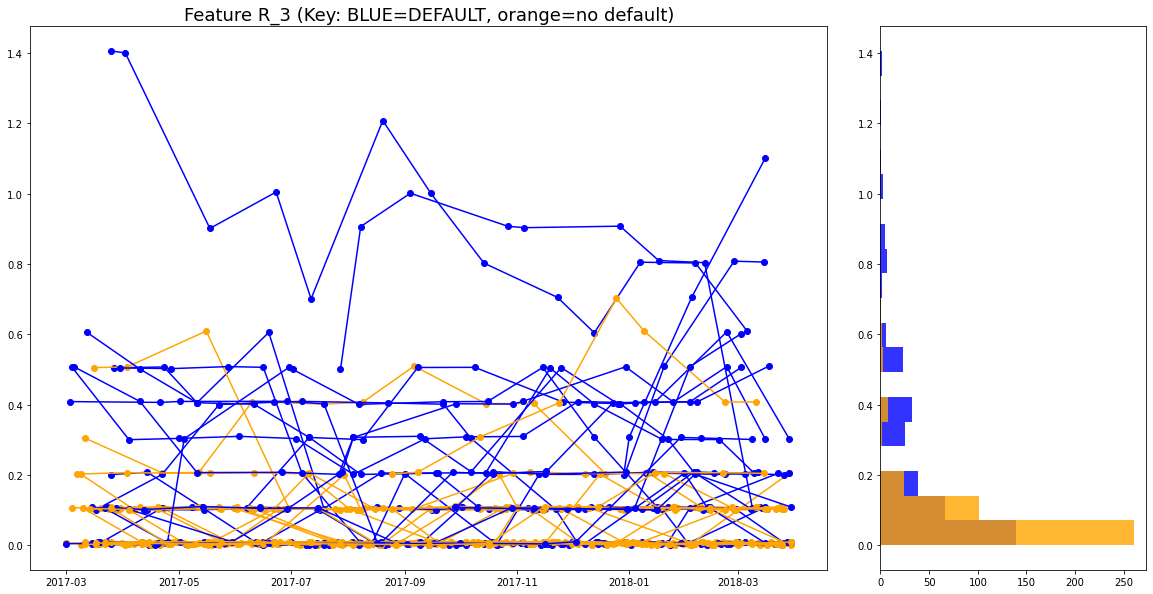

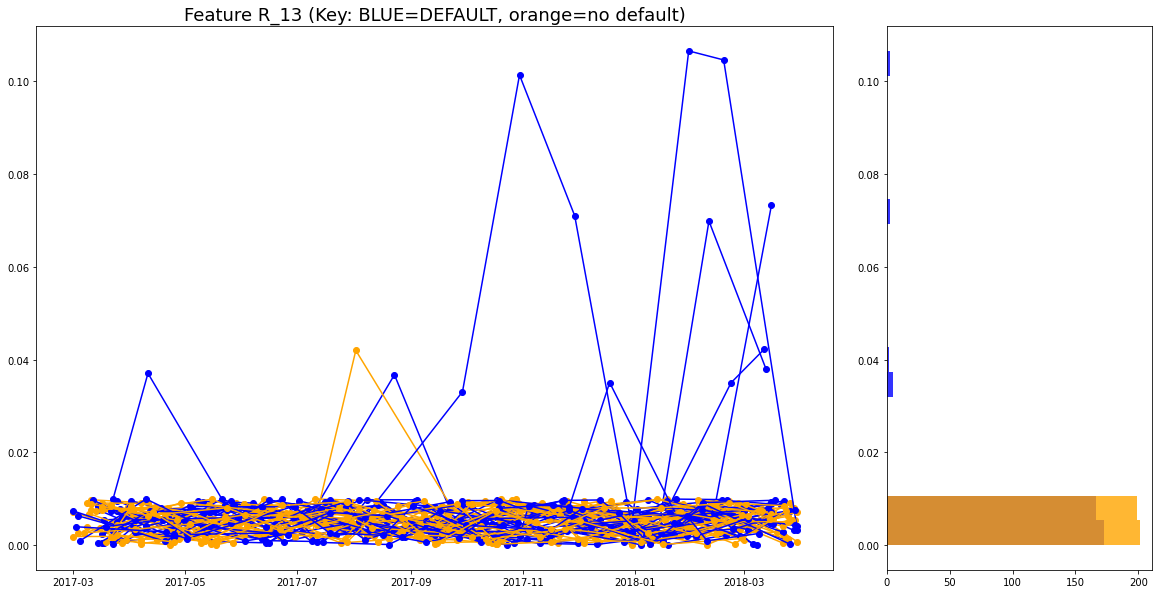

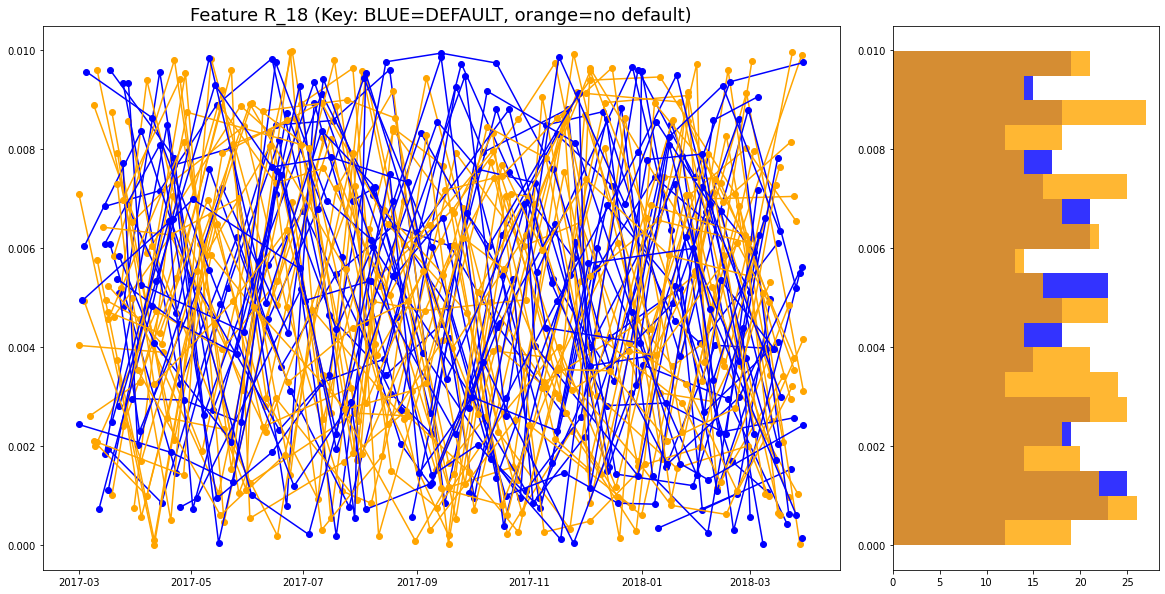

In [7]:
# LEAVE LIST BLANK TO PLOT ALL
plot_time_series('R',[1,3,13,18])